In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
iris=pd.read_csv('/content/iris (1).csv')
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.isnull().sum()

,0
SL,7
SW,6
PL,6
PW,0
Classification,0


In [5]:
iris.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris['Classification'].shape

(150,)

In [7]:
iris['Classification'].nunique()

3

# finding outliers

In [8]:
from matplotlib import pyplot as plt

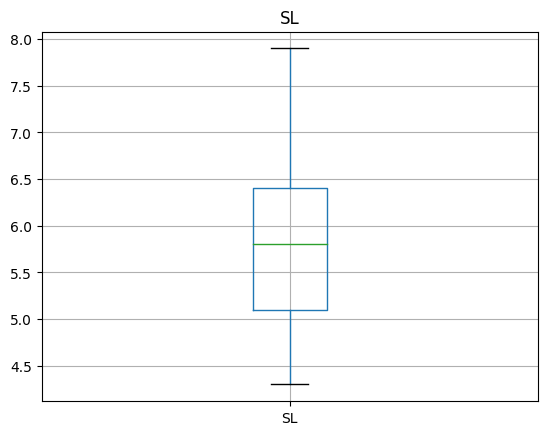

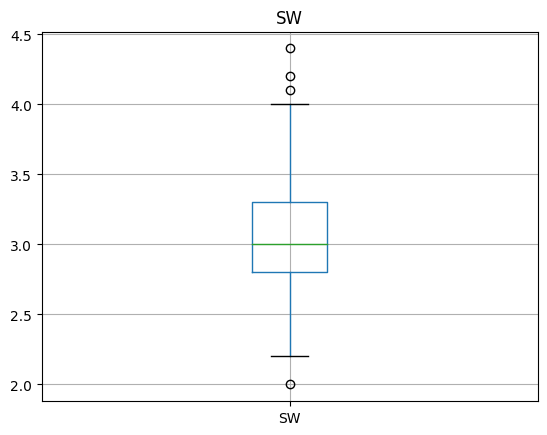

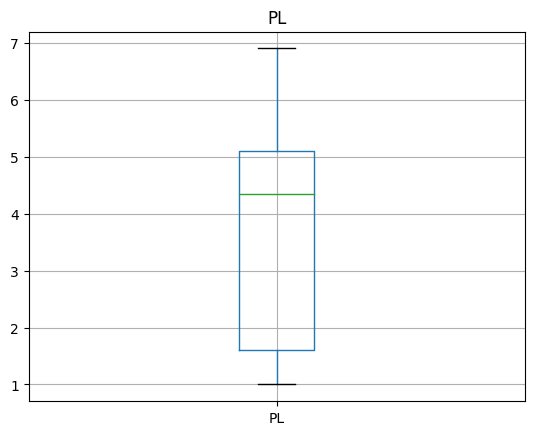

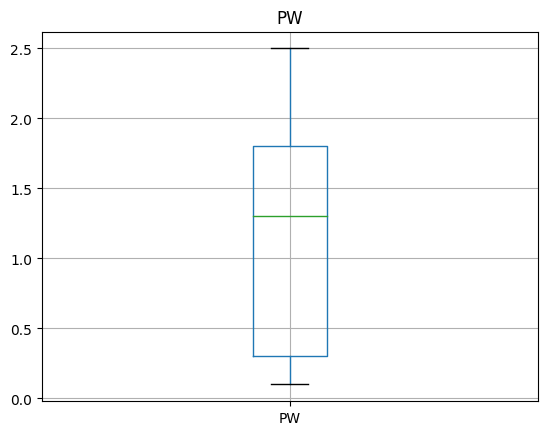

In [9]:
for col in iris.columns:
  if iris[col].dtype != 'object':
    plt.figure()
    iris.boxplot([col])
    plt.title(col)

In [10]:
for col in iris.columns:
  if iris[col].dtype !='object':
    q1=iris[col].quantile(0.25)
    q2=iris[col].quantile(0.75)

   # find iqr
    iqr=q2-q1

   ##upper bound and lower
    upper=q2+1.5*iqr
    lower=q1-1.5*iqr
    iris[col]=np.where(iris[col]>upper,upper,iris[col])
    iris[col]=np.where(iris[col]<lower,lower,iris[col])


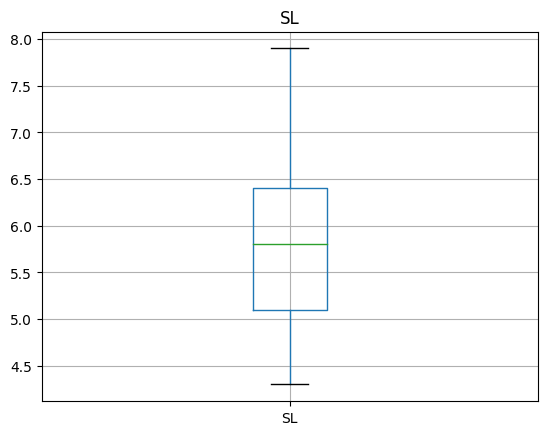

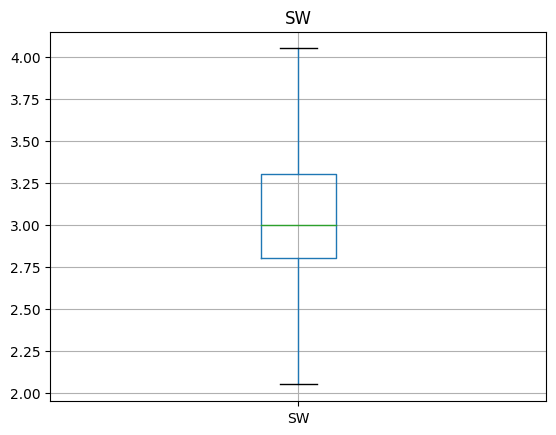

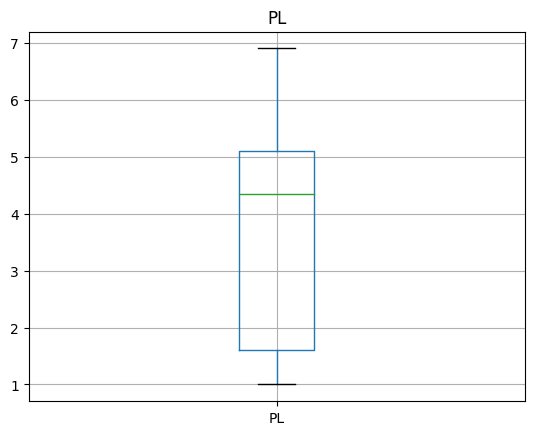

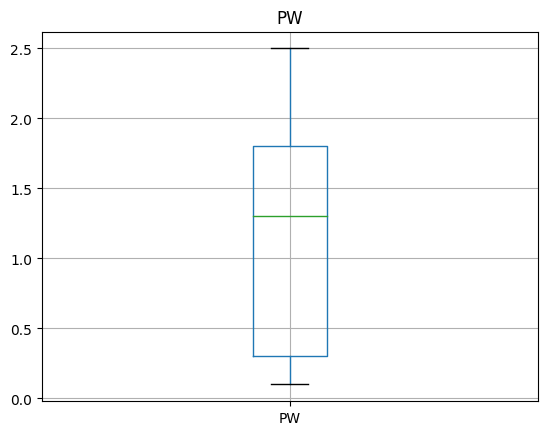

In [11]:
for col in iris.columns:
  if iris[col].dtype !='object':
    plt.figure()
    iris.boxplot([col])
    plt.title(col)

In [12]:
iris.isnull().sum()

,0
SL,7
SW,6
PL,6
PW,0
Classification,0


In [13]:
iris.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.045833,3.756250,1.198667
std,0.828168,0.419519,1.761306,0.763161
min,4.300000,2.050000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.050000,6.900000,2.500000


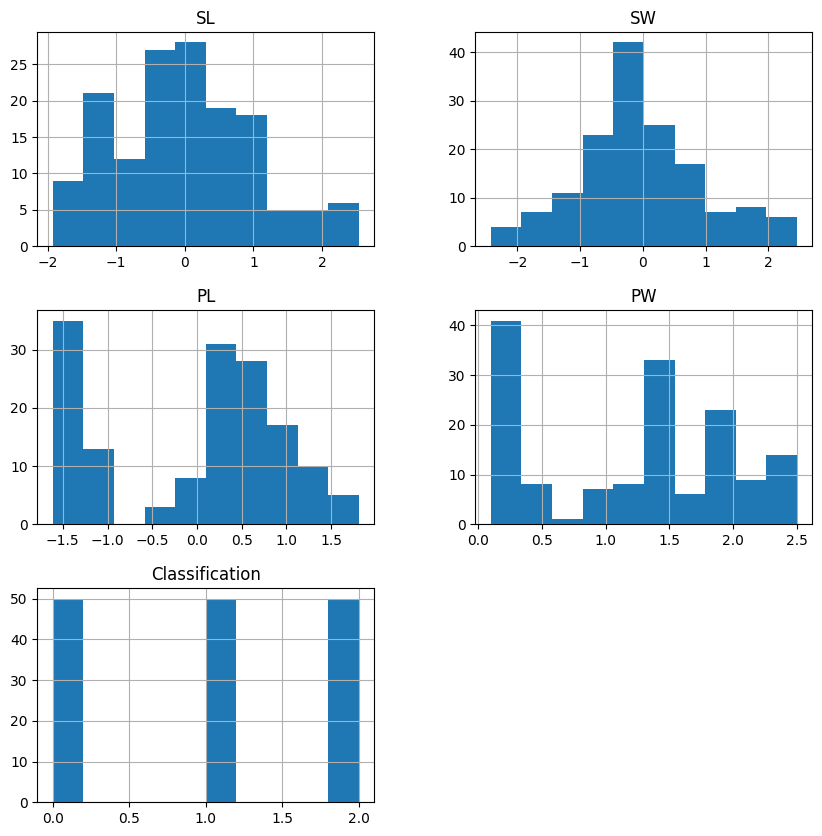

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
iris.hist(figsize=(10,10))
plt.show()

#filing out missing value with median

In [14]:
iris['SL'].fillna(iris['SL'].median(),inplace=True)
iris['SW'].fillna(iris['SW'].median(),inplace=True)
iris['PL'].fillna(iris['PL'].median(),inplace=True)

In [15]:
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



**standardize**

In [16]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

In [17]:
iris['SL']=scaler.fit_transform(iris[['SL']])
iris['SW']=scaler.fit_transform(iris[['SW']])
iris['PL']=scaler.fit_transform(iris[['PL']])
iris.head()

,SL,SW,PL,PW,Classification
0,-0.934811,1.112977,-1.380791,0.2,Iris-setosa
1,-1.182990,-0.107392,-1.380791,0.2,Iris-setosa
2,-0.066181,0.380755,-1.438808,0.2,Iris-setosa
3,-1.555260,0.136681,-1.322775,0.2,Iris-setosa
4,-1.058900,1.357050,-1.380791,0.2,Iris-setosa


# converting 'classification' into integers

In [43]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

iris['Classification']=encoder.fit_transform(iris['Classification'])
iris

,SL,SW,PL,PW,Classification
0,-0.934811,1.112977,-1.380791,0.2,0
1,-1.182990,-0.107392,-1.380791,0.2,0
2,-0.066181,0.380755,-1.438808,0.2,0
3,-1.555260,0.136681,-1.322775,0.2,0
4,-1.058900,1.357050,-1.380791,0.2,0
...,...,...,...,...,...
145,1.050628,-0.107392,0.823834,2.3,2
146,0.554268,-1.327762,0.707801,1.9,2
147,0.802448,-0.107392,0.330694,2.0,2
148,0.430178,0.868903,0.939866,2.3,2


In [19]:
iris.describe()

,SL,SW,PL,PW,Classification
count,1.500000e+02,1.500000e+02,150.000000,150.000000,150.000000
mean,-1.894781e-16,-1.184238e-16,0.000000,1.198667,1.000000
std,1.003350e+00,1.003350e+00,1.003350,0.763161,0.819232
min,-1.927530e+00,-2.426094e+00,-1.612857,0.100000,0.000000
25%,-8.107207e-01,-5.955401e-01,-1.264758,0.300000,0.000000
50%,-6.618128e-02,-1.073925e-01,0.330694,1.300000,1.000000
75%,6.783581e-01,5.638105e-01,0.765817,1.800000,2.000000
max,2.539707e+00,2.455383e+00,1.810113,2.500000,2.000000


# defining x and y and spliting the dataset

In [20]:
x=iris.drop(['Classification'],axis=1)
y=iris['Classification']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression(penalty= "l1", dual=False, tol= 0.0002, C=2, fit_intercept=True, intercept_scaling=2, random_state=42, solver="saga", max_iter= 100, multi_class="auto", verbose=0, warm_start= False, n_jobs=None, l1_ratio=None)
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('Precision is:', precision_score(y_test,y_pred,average='micro'))
print('Recall is:', recall_score(y_test,y_pred,average='micro'))
print('F1 score is:', f1_score(y_test,y_pred,average='micro'))

Accuracy is: 0.9666666666666667
Precision is: 0.9666666666666667
Recall is: 0.9666666666666667
F1 score is: 0.9666666666666667


In [23]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

# KNn

In [24]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)
metric_k

[1.0,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0]

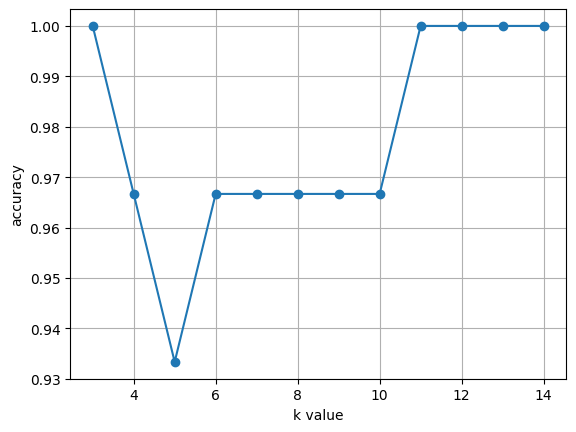

In [25]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [26]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2, weights='distance', algorithm='kd_tree', leaf_size=100,metric_params=None, n_jobs=None)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('Precision is:', precision_score(y_test,y_pred,average='micro'))
print('Recall is:', recall_score(y_test,y_pred,average='micro'))
print('F1 score is:', f1_score(y_test,y_pred,average='micro'))

Accuracy is : 1.0
Precision is: 1.0
Recall is: 1.0
F1 score is: 1.0


# SVM

In [27]:
from sklearn.svm import SVC
sv_clf=SVC(kernel='linear')
sv_clf.fit(x_train,y_train)

SVC(kernel='linear')

In [28]:
y_pred=sv_clf.predict(x_test)
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('Precision is:', precision_score(y_test,y_pred,average='micro'))
print('Recall is:', recall_score(y_test,y_pred,average='micro'))
print('F1 score is:', f1_score(y_test,y_pred,average='micro'))

Accuracy is : 0.9666666666666667
Precision is: 0.9666666666666667
Recall is: 0.9666666666666667
F1 score is: 0.9666666666666667


# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion='log_loss', splitter='random', max_depth=10, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight="balanced", ccp_alpha=0.0)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=10, splitter='random')

In [34]:
y_pred=dt_clf.predict(x_test)
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('Precision is:', precision_score(y_test,y_pred,average='micro'))
print('Recall is:', recall_score(y_test,y_pred,average='micro'))
print('F1 score is:', f1_score(y_test,y_pred,average='micro'))

Accuracy is : 1.0
Precision is: 1.0
Recall is: 1.0
F1 score is: 1.0


# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42,n_estimators=100, criterion='log_loss', max_depth=20, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, verbose=0, warm_start=False, class_weight='balanced_subsample', ccp_alpha=0.0, max_samples=None)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='log_loss',
                       max_depth=20, max_features=None, random_state=42)

In [40]:
y_pred = rf_clf.predict(x_test)
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:', precision_score(y_test,y_pred,average='micro'))
print('Recall is:', recall_score(y_test,y_pred,average='micro'))
print('F1 score is:', f1_score(y_test,y_pred,average='micro'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 score is: 1.0


#since the logistic regression ,KNn,Decision tree and Random forest gave the accuracy of 1.0 we are using hyperparametric tuning to decide which method is need to be selected

# so after hyper parametric tuning we get that **KNn,Decision Tree and random forest process** the accuracy of 1.0

# so we conclude that we can choose either one of these method